In [1]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from IPython import display

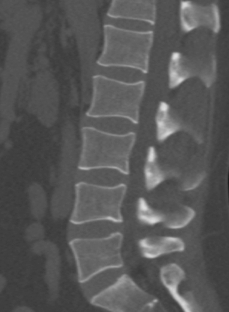

In [2]:
img_c_t = []
test_c = "26246471.jpg"   #test image for control group
#image preprocessing...
img_c = image.load_img(test_c,target_size=(80,60,3))
img = image.img_to_array(img_c)
norm = img/255
img_c_t.append(norm)
img_c_t = np.array(img_c_t)
display.Image(test_c)

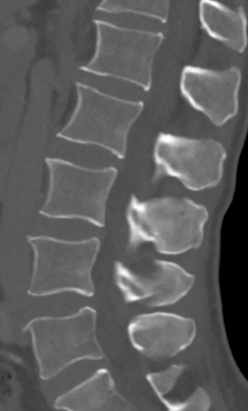

In [3]:
img_o_t = []
test_image_osteo = "16204172.jpg" #test image for osteoporosis group
#image preprocessing...
img_o = image.load_img(test_image_osteo,target_size=(80,60,3))
img = image.img_to_array(img_o)
norm = img/255
img_o_t.append(norm)
img_o_t = np.array(img_o_t)
display.Image(test_image_osteo)

In [4]:
# Loading model and weights...
loaded_model = keras.models.load_model("UNIMODALCT.h5") 
# compile and display model summary...
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
loaded_model.summary()

Model: "uni"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 80, 60, 3)]  0           []                               
                                                                                                  
 a1 (Conv2D)                    (None, 78, 58, 32)   896         ['img[0][0]']                    
                                                                                                  
 batch_normalization (BatchNorm  (None, 78, 58, 32)  128         ['a1[0][0]']                     
 alization)                                                                                       
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 39, 29, 32)   0           ['batch_normalization[0][0]']  

In [5]:
#Predicting test image (osteporosis...)
y_pred = loaded_model.predict(img_o_t)   
print('Osteoporosis:', y_pred) if np.round(y_pred) == 1 else print('Healthy:', y_pred)

1/1 [==============================] - 0s 150ms/step
Osteoporosis: [[0.9999999]]


In [6]:
#Predicting test image (control...)
y_pred = loaded_model.predict(img_c_t)   
print('Osteoporosis:', y_pred) if np.round(y_pred) == 1 else print('Healthy:', y_pred)

1/1 [==============================] - 0s 18ms/step
Healthy: [[2.7908736e-06]]
